### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


<strong>(1) What is the independent variable? What is the dependent variable?</strong>

The independent variable is whether the word is the same as its colour (congruent) or different to its colour (incongruent).<br>
The dependent variable is the time it takes for the tester to name the colour.

<strong>(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.</strong>

The null hypothesis ($H_0$) is that the response time it takes to name the colour regardless if the word is congruent or incongruent is the same.<br>
The alternative hypothesis ($H_1$) is that the response time it takes to name the colour is slower by 5% or more if the word is incongruent than if the word is congruent.<br><br>
Or stated in another way:<br>
$H_0$ = $\mu_{con}$ = $\mu_{incon}$<br>
$H_1$ = $\mu_{con}$ < $\mu_{incon}$

<strong>(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.</strong>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.shape[0]

24

In [4]:
con_mean = df.Congruent.mean()
incon_mean = df.Incongruent.mean()
print('Congruent mean:', con_mean)
print('Incongruent mean:', incon_mean)

Congruent mean: 14.051125000000004
Incongruent mean: 22.01591666666667


In [5]:
con_median = df.Congruent.median()
incon_median = df.Incongruent.median()
print('Congruent median:', con_median)
print('Incongruent median:', incon_median)

Congruent median: 14.3565
Incongruent median: 21.0175


In [6]:
q75, q25 = np.percentile(df.Congruent, [75,25])
iqr_con = q75 - q25
print('Congruent interquartile range:', iqr_con)

Congruent interquartile range: 4.3054999999999986


In [7]:
q75, q25 = np.percentile(df.Incongruent, [75,25])
iqr_incon = q75 - q25
print('Incongruent interquartile range:', iqr_incon)

Incongruent interquartile range: 5.33475


In [8]:
#calculate the standard deviation of the sample instead of the population using parameter ddof=1
std_con = np.std(df.Congruent, ddof=1)
std_incon = np.std(df.Incongruent, ddof=1)
print('Congruent standard deviation:',std_con)
print('Incongruent standard deviation:',std_incon)

Congruent standard deviation: 3.559357957645195
Incongruent standard deviation: 4.797057122469138


To measure central tendency, mean and median was used.<br>
For congruent words, the mean response time was 14.0511 and the median was 14.3565<br>
For incongruent words, the mean response time was 22.0159 and the median was 21.0175<br>

To measure variability, interquartile range and standard deviation was used.<br>
For congruent words, the interquartile range was 4.3055 and the standard deviation was 3.5593
For incongruent words, the interquartile range was 5.3348 and the standard deviation was 4.7970

<strong>(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</strong>

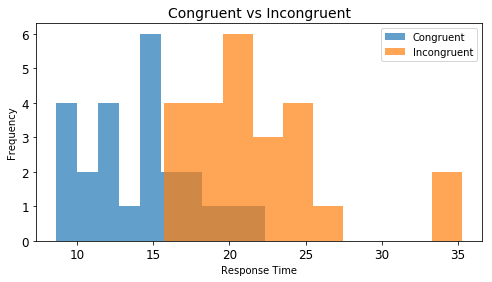

In [9]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)

ax = df.Congruent.plot.hist(
    fontsize=12, alpha=0.7
)
ax = df.Incongruent.plot.hist(
    fontsize=12, alpha=0.7
)
ax.set_xlabel('Response Time')
ax.set_ylabel('Frequency')
ax.set_title('Congruent vs Incongruent', fontsize=14)
ax.legend(labels=('Congruent','Incongruent'))

The response time for congruent words is generally quicker than incongruent words.<br>
The histogram does not show a perfectly normal bell curve but that is likely due to a small sample size of only 24 paired tests.<br>
It is also interesting that 2 responses for incongruent words took quite a bit longer than the others at about 34 seconds. This could be due to the testers thinking longer and more deeply about the problem.

<strong>(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.</strong>

In [10]:
#perform a paired t-test
stats.ttest_rel(df.Congruent, df.Incongruent) 

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

We have chosen to use a paired t-test to perform the statistical test. We used the `ttest_rel` function from the scipy package. We chose this test because of the following facts:
  * The null hypothesis is $\mu_{con}$ = $\mu_{incon}$, therefore we are testing both tails, that is a two-tailed test.
  * The congruent and incongruent results are paired because they are part of the same test performed by the same person.
  * The distribution is not perfectly normal. This is likely due to the small sample size. If we wanted the distribution closer to normal, we could increase the sample size. In this case however we can assume normality as the results are similar to what we can expect a human to perform. Normality is important as a t-test expects the distribution to be normal or close to normal for accurate results.

In the results the p-value is much smaller than 0.05 therefore we can reject the null hypothesis and go with the alternative hypothesis which is that incongruent words take longer to respond than congruent words.

<strong>(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</strong>

It is quicker to respond when the word matched the word's colour because there is no conflict. When the word did not match the colour it would take longer to respond because you had to think harder to work out the colour.<br><br>
Another version of the stroop effect that would result in a similar effect is the emotional stroop test where some words are associated with negative emotions like "anxiety" or "depression". The response times for these words would take longer especially if the tester also suffered from these illnesses.

### Resources

Dependent t-test for paired samples<br>
https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php
